# Numpy

## Note 1: Array in Numpy

In [1]:
import numpy as np

In [2]:
# example of array
nama = [['Ani', 'Budi', 'Cika'],
        ['Andi', 'Bina', 'Cita']]
nama1 = np.array(nama)
print (nama1[1,0])

Andi


In [3]:
# array like list but more eficient
height = [1.87,  1.87, 1.82, 1.91, 1.90, 1.85]
weight = [81.65, 97.52, 95.25, 92.98, 86.18, 88.45]
np_height = np.array(height)
np_weight = np.array(weight)
np_total = np.column_stack((np_height, np_weight))
print(np_total[:3, :])


[[ 1.87 81.65]
 [ 1.87 97.52]
 [ 1.82 95.25]]


In [4]:
# check total rows and columns
np_total.shape

(6, 2)

In [5]:
# Calculate bmi
bmi = list(np_weight / np_height ** 2)
for x in bmi:
    if x > 23:
        print(round(x, 2))

23.35
27.89
28.76
25.49
23.87
25.84


In [6]:
# search mean (average) method
mean_height = np.mean(np_height)
print(mean_height)

# search median method
median_height = np.median(np_height)
print(median_height)

# search correlation coeficition
corrcoef_total = np.corrcoef(np_height, np_weight)
print(corrcoef_total)

# search standar deviation
stdev_height = np.std(np_height)
print(stdev_height)

1.87
1.87
[[ 1.         -0.23077148]
 [-0.23077148  1.        ]]
0.02999999999999994


In [10]:
x = {1,2,3,4,5}
x.add(5)
x.add(6)
print(x)

{1, 2, 3, 4, 5, 6}


# Pandas

## Note 1: Series and Data Frame

In [2]:
import pandas as pd

### Data Frame

In [23]:
dict1 = {"country"  : ["Brazil", "Russia", "India", "China", "South Africa"],
        "capital"   : ["Brasilia", "Moscow", "New Dehli", "Beijing", "Pretoria"],
        "area"      : [8.516, 17.10, 3.286, 9.597, 1.221],
        "population": [200.4, 143.5, 1252, 1357, 52.98] }

# convert into pandas dataframe
brics = pd.DataFrame(dict1)
brics.index = ["BR", "RU", "IN", "CH", "SA"]
brics.head()

,country,capital,area,population
BR,Brazil,Brasilia,8.516,200.40
RU,Russia,Moscow,17.100,143.50
IN,India,New Dehli,3.286,1252.00
CH,China,Beijing,9.597,1357.00
SA,South Africa,Pretoria,1.221,52.98


### Series

In [4]:
list2 = ["Brazil", "Russia", "India", "China", "South Africa"]

# convert into pandas series
data2 = pd.Series(list2, name='Country')
data2

0          Brazil
1          Russia
2           India
3           China
4    South Africa
Name: Country, dtype: object

In [5]:
# count column
count_column = brics.shape[1]  # have to use 1
print(count_column)

# count row
count_row = brics.shape[0]     # have to use 0
print(count_row)

4
5


## Note 2: CSV file

### import dataaset

In [15]:
data = pd.read_csv('../.data_set/test3.csv')
data.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


### check for dimension

In [16]:
data.shape

(169, 4)

### clean data

In [17]:
# clean data from null values and non numeric
data.dropna(axis=0, inplace=True)

# check after cleaning
data.shape

(164, 4)

### column access method

In [33]:
# first as attribute
data1 = data.Duration.head()
print(data1)

# second as dictionary index
data2 = data['Duration'].head()
print(data2)

0    60
1    60
2    60
3    45
4    45
Name: Duration, dtype: int64
0    60
1    60
2    60
3    45
4    45
Name: Duration, dtype: int64


### access data in dataframe

In [47]:
# use column name
data1 = data.Duration[0]      # access first row in first column
print(data1,'\n')

# use iloc method
data2 = data.iloc[0]          # access in first row
print(data2, '\n')

data3 = data.iloc[:3,0]       # access in first third row in first column
print(data3, '\n')

# use loc method
data4 = data.loc[:3]          # access in first row
print(data4, '\n')

# alternative method
data5 = data[['Duration', 'Calories']][:5]
print(data5)

60 

Duration     60.0
Pulse       110.0
Maxpulse    130.0
Calories    409.1
Name: 0, dtype: float64 

0    60
1    60
2    60
Name: Duration, dtype: int64 

   Duration  Pulse  Maxpulse  Calories
0        60    110       130     409.1
1        60    117       145     479.0
2        60    103       135     340.0
3        45    109       175     282.4 

   Duration  Calories
0        60     409.1
1        60     479.0
2        60     340.0
3        45     282.4
4        45     406.0


### Change index

In [48]:
# change index column
# data.set_index('Duration')

# reset index after change
# data.reset_index()

### conditional selection 

In [62]:
data['Duration'][data['Duration']==60]

0      60
1      60
2      60
5      60
6      60
       ..
157    60
158    60
164    60
165    60
166    60
Name: Duration, Length: 76, dtype: int64

### columns modification

In [64]:
data.columns

# to add column, same method like add dictionary

Index(['Duration', 'Pulse', 'Maxpulse', 'Calories'], dtype='object')

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  164 non-null    int64  
 1   Pulse     164 non-null    int64  
 2   Maxpulse  164 non-null    int64  
 3   Calories  164 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 9.5 KB


### create a summary

In [67]:
data.describe()

,Duration,Pulse,Maxpulse,Calories
count,164.000000,164.000000,164.00000,164.000000
mean,64.146341,107.676829,134.27439,375.790244
std,42.888820,14.637516,16.58306,266.379919
min,15.000000,80.000000,100.00000,50.300000
25%,45.000000,100.000000,124.00000,250.925000
50%,60.000000,105.500000,131.00000,318.600000
75%,60.000000,111.000000,143.00000,387.600000
max,300.000000,159.000000,184.00000,1860.400000


In [70]:
data.Duration.value_counts()

60     76
45     33
30     16
20      9
90      8
150     4
180     3
120     3
210     2
160     2
15      2
75      2
80      1
300     1
270     1
25      1
Name: Duration, dtype: int64

In [11]:
# change data type in table
data['Duration'] = data['Duration'].astype(float)
data['Pulse'] = data['Pulse'].astype(float)
data['Maxpulse'] = data['Maxpulse'].astype(float)

# data type in table
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  164 non-null    float64
 1   Pulse     164 non-null    float64
 2   Maxpulse  164 non-null    float64
 3   Calories  164 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


# Matplotlib and Seaborn

## Note 1: Plot and ScatterPlot

In [1]:
from matplotlib import pyplot as plt
import seaborn as sns

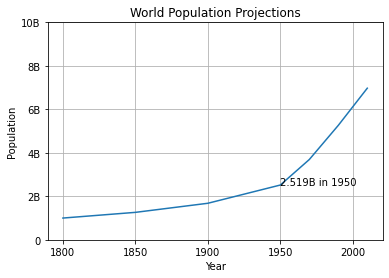

In [2]:
year = [1950, 1970, 1990, 2010]
pop  = [2.519, 3.692, 5.263, 6.972]
pop_size = [100, 100, 100, 100]

# add some year
year = [1800, 1850, 1900] + year
pop  = [1.0, 1.262, 1.680] + pop
pop_size = [100, 100, 100] + pop_size

# plot
plt.plot(year, pop)                         # make the graph
plt.grid(True)                              # give gridlines

# add some customization
plt.xlabel('Year')                          # give x-axis label
plt.ylabel('Population')                    # give y-axis label
plt.title('World Population Projections')   # give title to chart
plt.yticks([0,2,4,6,8,10],                  # give name to y value
           ['0','2B','4B','6B','8B','10B'])
plt.text(1950, 2.519, '2.519B in 1950')     # give text to graph

# print visualization
plt.show()

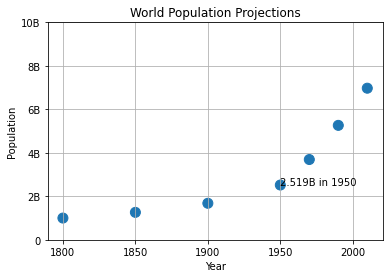

In [3]:
# scatter plot
plt.scatter(year, pop, s=pop_size)

# add customization
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('World Population Projections')
plt.yticks([0,2,4,6,8,10],
           ['0','2B','4B','6B','8B','10B'])
plt.grid(True)
plt.text(1950, 2.519, '2.519B in 1950')

# show visualization
plt.show()

## Note 2: Histogram

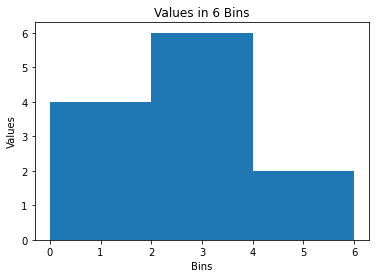

In [4]:
# histogram to undestand the data distribution
values = [0, 0.6, 1.4, 1.6, 2.2, 2.5, 2.6, 3.2, 3.5, 3.9, 4.2, 6]
plt.hist(values, bins=3)

plt.xlabel('Bins')
plt.ylabel('Values')
plt.title('Values in 6 Bins')

plt.show()

# Selenium

In [2]:
!pip show selenium

Name: selenium
Version: 4.1.0
Summary: Python bindings for Selenium
Home-page: https://github.com/SeleniumHQ/selenium/
Author: 
Author-email: 
License: Apache 2.0
Location: c:\users\rizky\miniconda3\envs\home\lib\site-packages
Requires: trio, trio-websocket, urllib3
Required-by: 


## Deprecated

In [ ]:
path = "../msedgedriver.exe"
driver = webdriver.Edge(executable_path=path) #deprecated

driver.find_element_by_class_name() #deprecated

## Note 1: Open Browser

In [5]:
from selenium import webdriver
from selenium.webdriver.edge.service import Service

In [16]:
PATH = "../msedgedriver.exe"
service = Service(executable_path=PATH)
options = webdriver.EdgeOptions()

In [10]:
driver = webdriver.Edge(service=service, options=options)

driver.get("https://www.google.com")

print(driver.title

driver.quit()

Google


## Note 2: Get Element

In [15]:
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [17]:
driver = webdriver.Edge(service=service, options=options)

driver.get("https://www.techwithtim.net")

search_box = driver.find_element(By.NAME, "s")
search_box.send_keys("test")
search_box.send_keys(Keys.ENTER)

# define explicitly waiting
try:
    main = WebDriverWait(driver, 10).until(
    EC.presence_of_element_located((By.ID, "main")))
    
    articles = main.find_elements(By.TAG_NAME, "article")
    for article in articles:
        header = article.find_element(By.CLASS_NAME, "entry-summary")
        print(header.text)
finally:
    driver.quit()

HTTP MethodsIn this tutorial we will talk about HTTP methods. HTTP methods are the standard way of sending information to and from a web server. To break it down, a website runs on a server or multiple servers and simple returns information to a client (web-browser). Information is exchanged between the client and the server […]
Creating a Base Template So you may have realized that creating new web pages for every single page on our website is extremely inefficient. Especially when our website follows a theme and has similar elements (like a sidebar) on every page. This is where template inheritance comes in. We will talk about how to inherit […]
Redirecting ContinuedStarting from where we left off in the last tutorial. I wanted to show how to redirect to a function that takes an argument (like our user function). To do this we simply need to define the parameter name and a value in the url_for function, like below.from flask import Flask, redirect, url_for app […]
What is Flask?Flask